In [30]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Suppress warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="keras")

In [31]:
df = pd.read_csv("C:/Users/hcmon/OneDrive/Desktop/Training_set.csv")
image_dir = "C:/Users/hcmon/OneDrive/Desktop/train"
print(f"Total images: {len(df)}")
print(df.head())

Total images: 6499
      filename                     label
0  Image_1.jpg          SOUTHERN DOGFACE
1  Image_2.jpg                    ADONIS
2  Image_3.jpg            BROWN SIPROETA
3  Image_4.jpg                   MONARCH
4  Image_5.jpg  GREEN CELLED CATTLEHEART


In [32]:
len(df)

6499

C:\Users\hcmon\AppData\Local\Temp\ipykernel_26536\3865910680.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


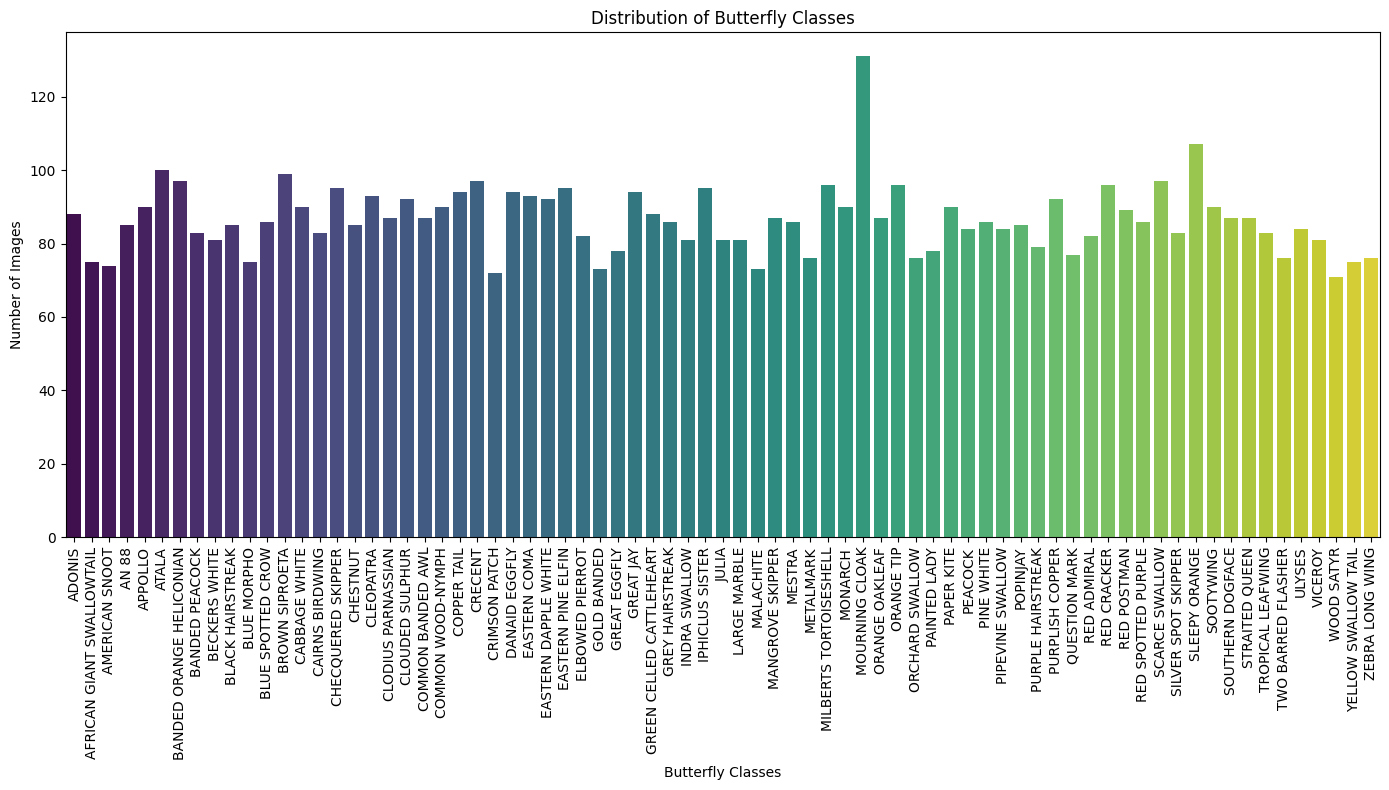

In [33]:
class_counts = df['label'].value_counts().sort_index()

plt.figure(figsize=(14, 8))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribution of Butterfly Classes')
plt.xlabel('Butterfly Classes')
plt.ylabel('Number of Images')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

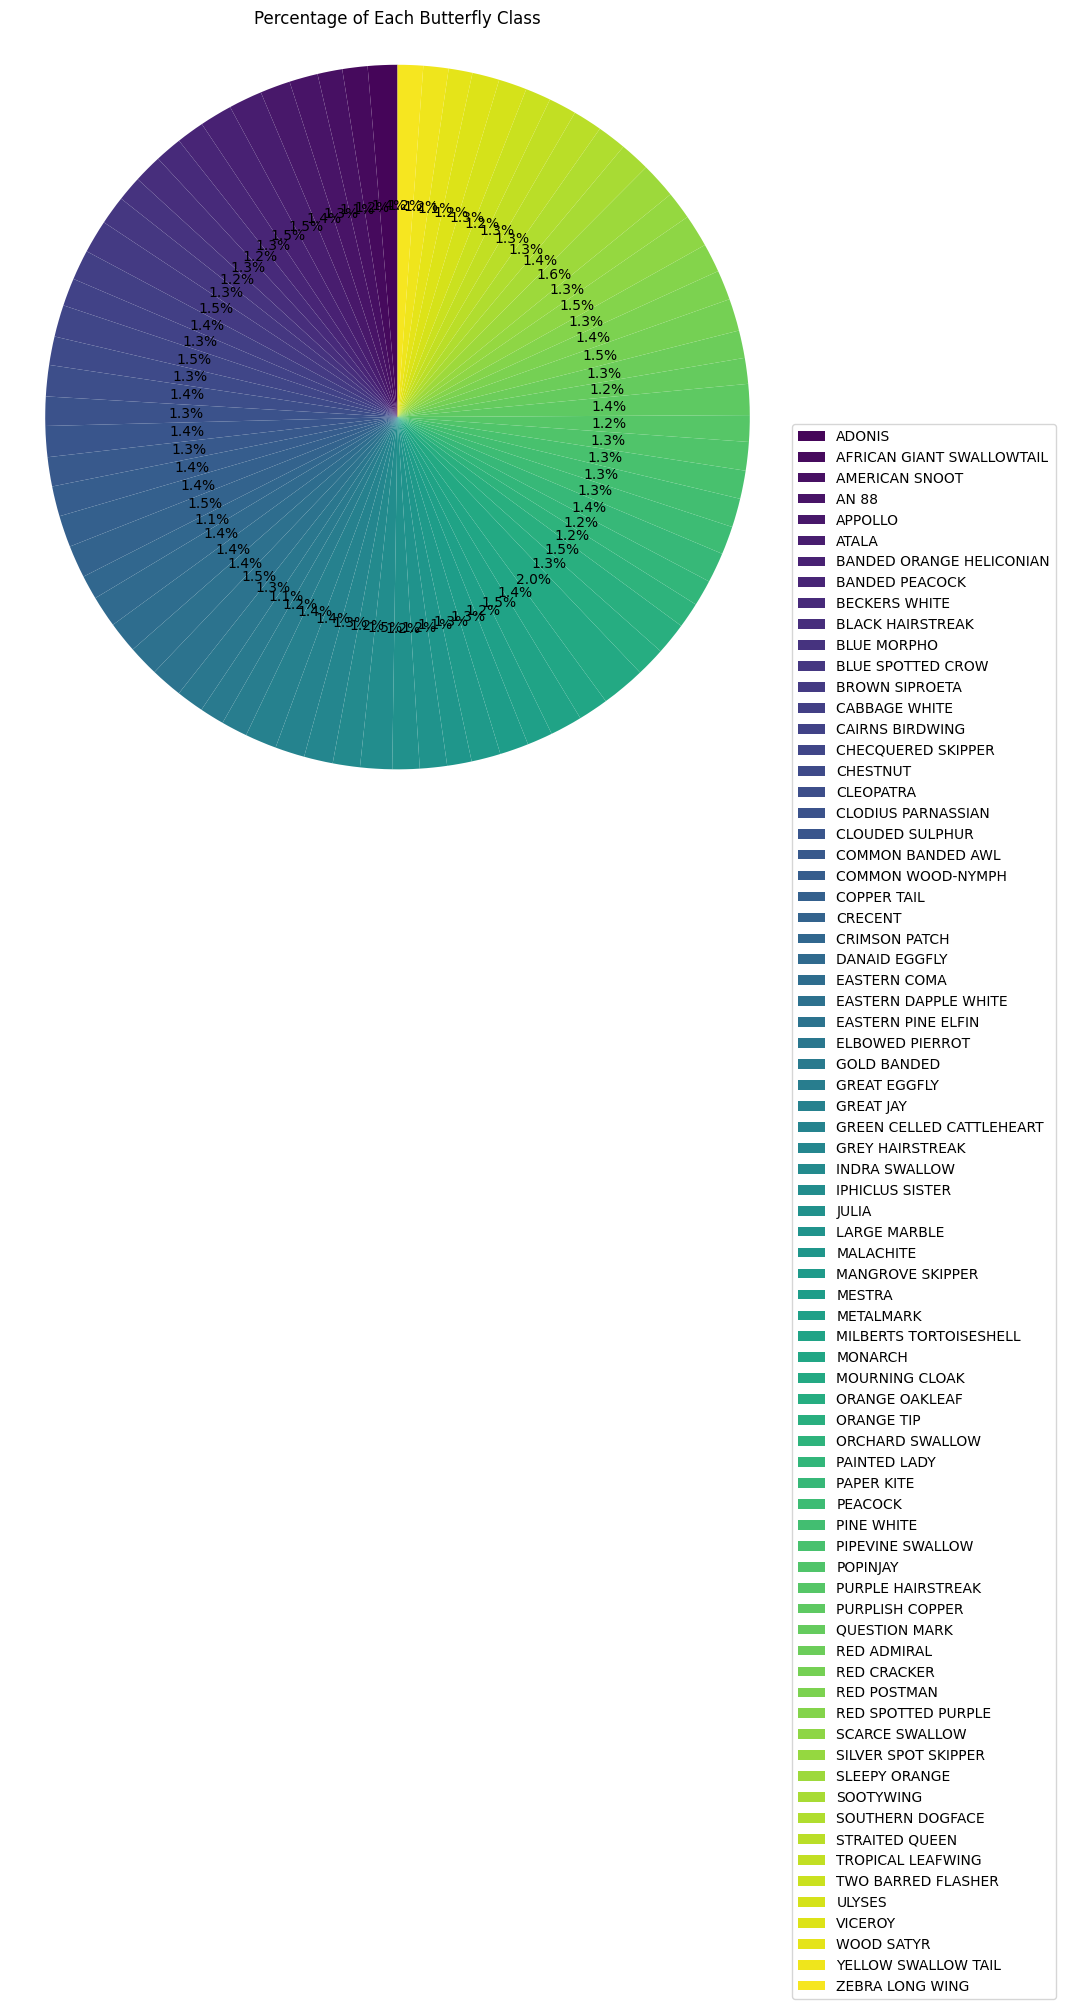

In [34]:
colors = sns.color_palette("viridis", len(class_counts))
class_counts = df['label'].value_counts().sort_index()


plt.figure(figsize=(10, 10))
plt.pie(class_counts.values, labels=None, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentage of Each Butterfly Class')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(class_counts.index, loc="best", bbox_to_anchor=(1, 0.5))
plt.show()

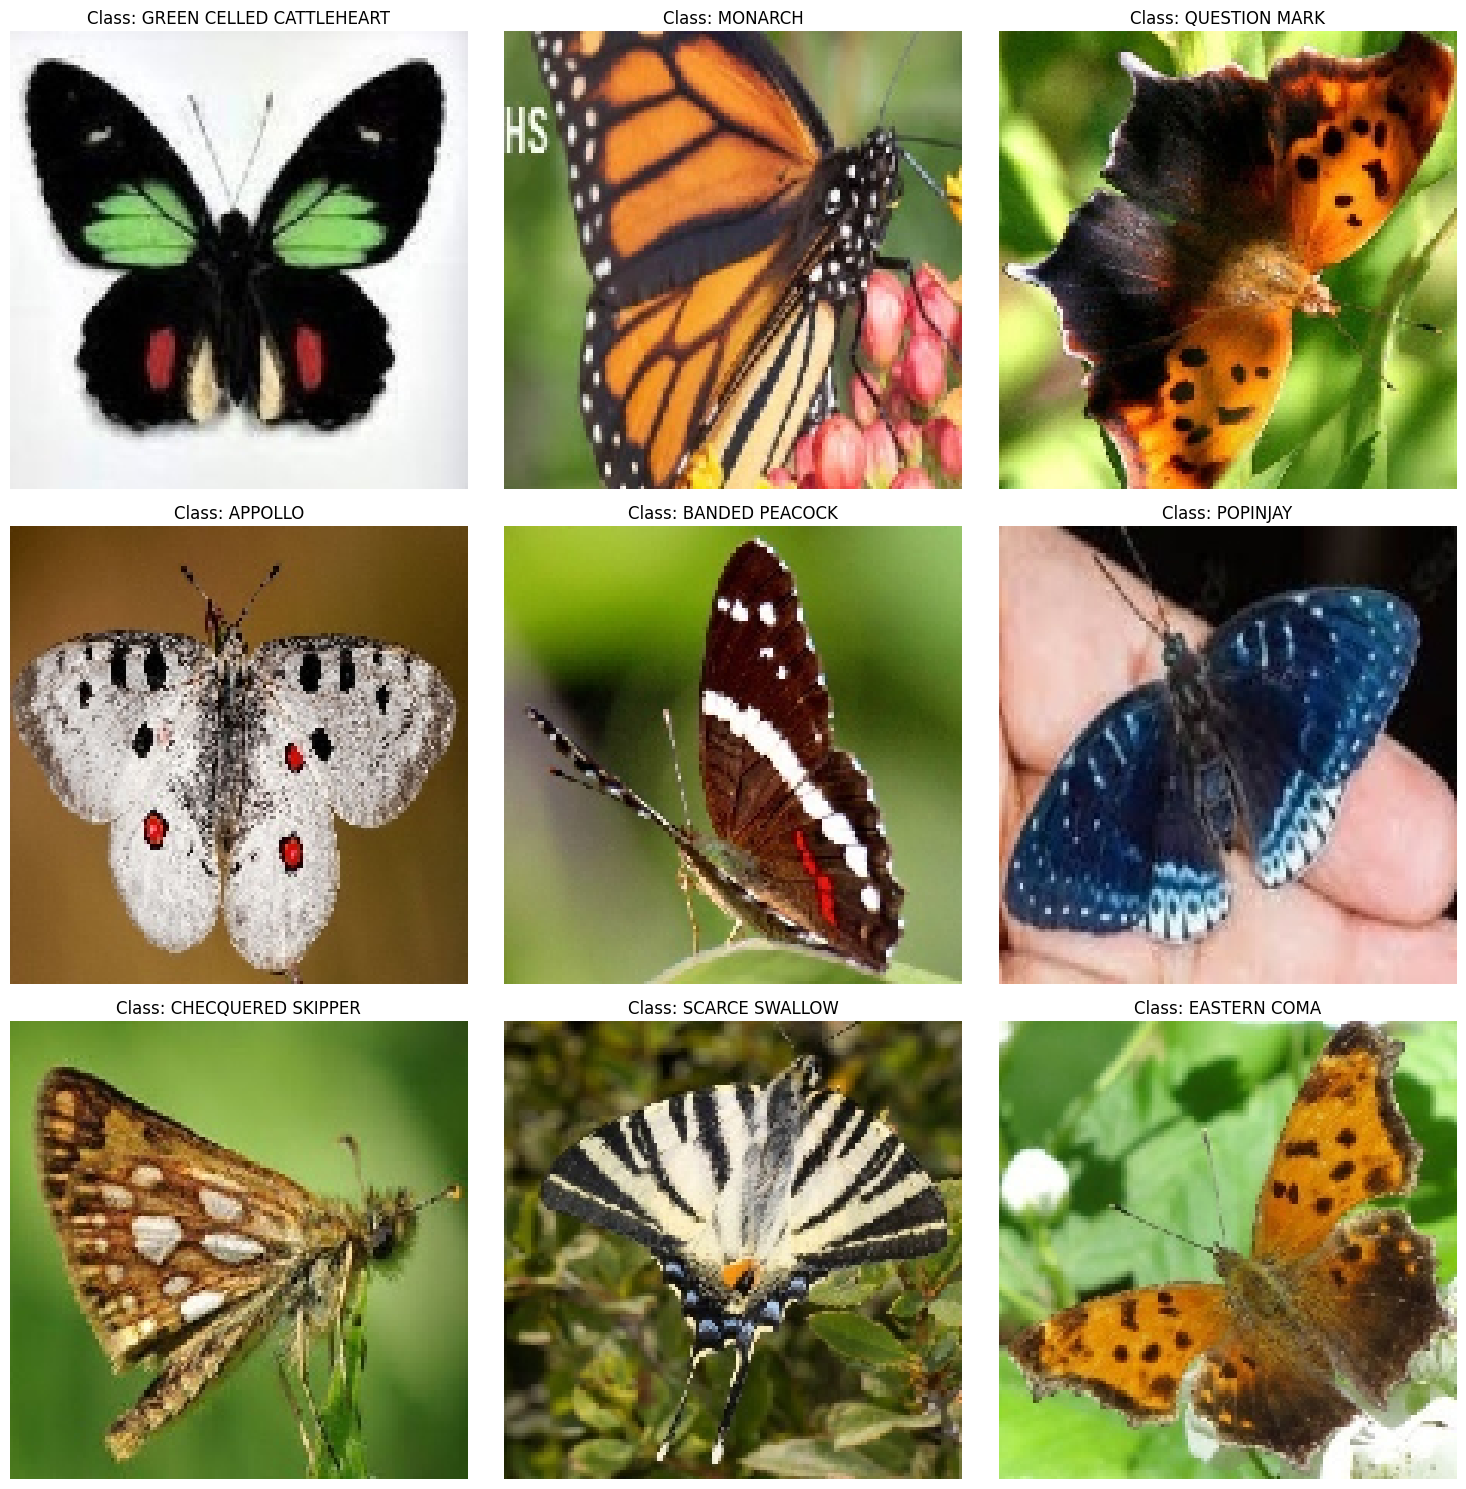

In [35]:
image_dir = "C:/Users/hcmon/OneDrive/Desktop/train"

sample_images = df.sample(9, random_state=42)


fig, axes = plt.subplots(3, 3, figsize=(15, 15))


for i, (index, row) in enumerate(sample_images.iterrows()):
    img_path = os.path.join(image_dir, row['filename'])
    img = load_img(img_path, target_size=(150, 150))
    img_array = img_to_array(img) / 255.0  # Normalize the image
    
    ax = axes[i // 3, i % 3]
    ax.imshow(img_array)
    ax.set_title(f"Class: {row['label']}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [36]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

image_dir = "C:/Users/hcmon/OneDrive/Desktop/train"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=image_dir,
    x_col='filename',
    y_col='label',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 5199 validated image filenames belonging to 75 classes.
Found 1300 validated image filenames belonging to 75 classes.


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model_CNN = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(75, activation='softmax') #to match the nb of classes 
])

model_CNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_CNN.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 128)     

In [40]:
history = model_CNN.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=40,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

Epoch 1/40
162/162 [==============================] - 201s 1s/step - loss: 3.9689 - accuracy: 0.0546 - val_loss: 3.2350 - val_accuracy: 0.1555
Epoch 2/40
162/162 [==============================] - 203s 1s/step - loss: 3.0259 - accuracy: 0.2003 - val_loss: 2.7296 - val_accuracy: 0.3063
Epoch 3/40
162/162 [==============================] - 195s 1s/step - loss: 2.5447 - accuracy: 0.3104 - val_loss: 2.1888 - val_accuracy: 0.3688
Epoch 4/40
162/162 [==============================] - 194s 1s/step - loss: 2.1839 - accuracy: 0.4012 - val_loss: 1.9476 - val_accuracy: 0.4547
Epoch 5/40
162/162 [==============================] - 186s 1s/step - loss: 1.9509 - accuracy: 0.4595 - val_loss: 1.8537 - val_accuracy: 0.4867
Epoch 6/40
162/162 [==============================] - 194s 1s/step - loss: 1.7486 - accuracy: 0.5026 - val_loss: 1.5382 - val_accuracy: 0.5703
Epoch 7/40
162/162 [==============================] - 195s 1s/step - loss: 1.5840 - accuracy: 0.5433 - val_loss: 1.4858 - val_accuracy: 0.5711

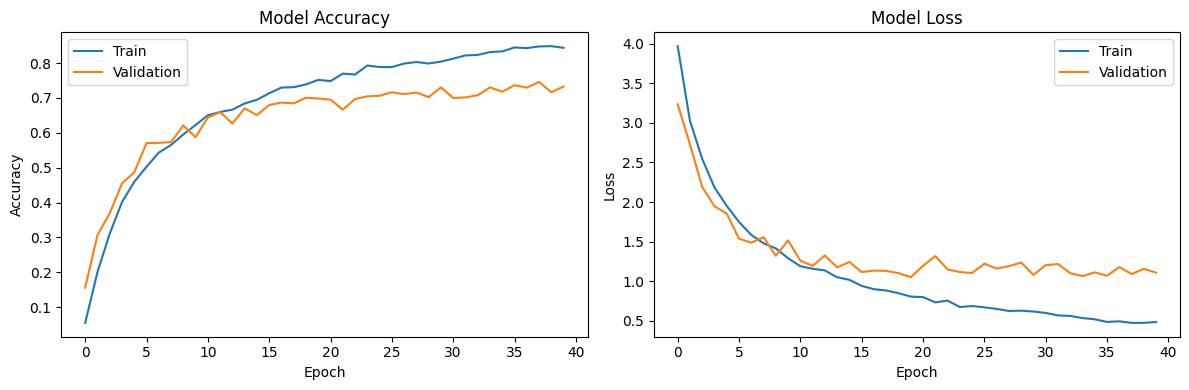

In [41]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.tight_layout()
plt.show()


Classification Report:
                          precision    recall  f1-score   support

BANDED ORANGE HELICONIAN       1.00      1.00      1.00         1
           BECKERS WHITE       1.00      1.00      1.00         1
             BLUE MORPHO       0.00      0.00      0.00         1
         CAIRNS BIRDWING       1.00      1.00      1.00         1
      CHECQUERED SKIPPER       0.50      0.50      0.50         2
                CHESTNUT       1.00      1.00      1.00         2
         CLOUDED SULPHUR       1.00      1.00      1.00         1
       COMMON WOOD-NYMPH       1.00      1.00      1.00         2
                 CRECENT       1.00      1.00      1.00         1
           DANAID EGGFLY       0.50      1.00      0.67         1
            EASTERN COMA       0.00      0.00      0.00         0
         ELBOWED PIERROT       1.00      1.00      1.00         1
         GREY HAIRSTREAK       0.50      1.00      0.67         1
           INDRA SWALLOW       0.00      0.00      

C:\Users\hcmon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hcmon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hcmon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

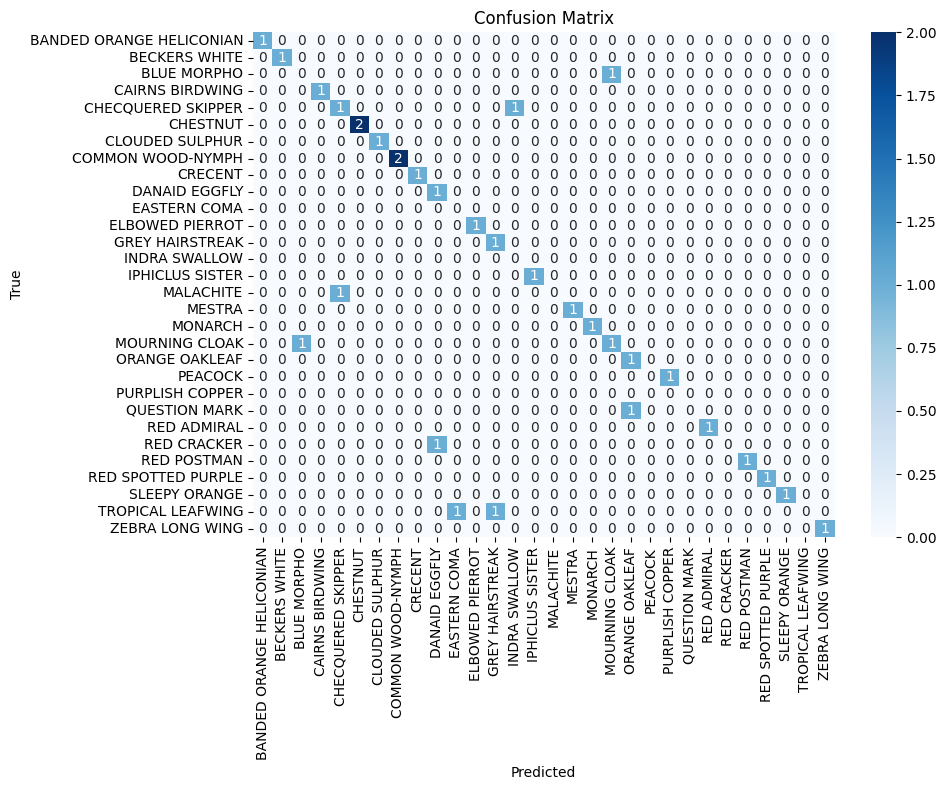

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have y_true, y_pred, and class_names already defined as shown previously

# Identify all unique classes in the predictions and true labels
unique_classes = np.unique(np.concatenate((y_true, y_pred)))

# Filter the class_names to include only those that are present
filtered_class_names = [class_names.get(cls, "Unknown Class") for cls in unique_classes]

# Generate the classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, labels=unique_classes, target_names=filtered_class_names))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=unique_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=filtered_class_names, yticklabels=filtered_class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [52]:
import matplotlib.pyplot as plt

def display_predictions(images, true_labels, pred_labels, class_names, num_images=16):
    """
    Display a grid of images with their predicted and true labels.

    Args:
    - images (array): The images to display.
    - true_labels (array): True labels for the images.
    - pred_labels (array): Predicted labels for the images.
    - class_names (list): List containing the names of the classes.
    - num_images (int): Number of images to display.
    """
    # Ensure we don't exceed the number of available images or labels
    num_images = min(num_images, len(images), len(true_labels), len(pred_labels))

    # Calculate number of columns and rows to display
    cols = 4
    rows = (num_images // cols) + (num_images % cols > 0)

    # Set up the matplotlib figure and size it appropriately
    plt.figure(figsize=(cols * 4, rows * 4))
    for i in range(num_images):
        ax = plt.subplot(rows, cols, i + 1)
        ax.imshow(images[i])
        
        true_label = class_names[int(true_labels[i])]
        pred_label = class_names[int(pred_labels[i])]
        
        # Set the title for each image with color coding based on correctness
        color = 'green' if true_label == pred_label else 'red'
        ax.set_title(f"True: {true_label}\nPred: {pred_label}", color=color)
        
        ax.axis("off")  # Turn off axis labels

    plt.suptitle("Model Predictions on Validation Data", fontsize=16, fontweight='bold', color='darkblue')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the global title
    plt.show()


In [74]:
# Import necessary libraries
import numpy as np

# Make predictions
val_images, val_labels = next(val_generator)  # This fetches one batch of validation data
predictions = model_CNN.predict(val_images)
pred_labels = np.argmax(predictions, axis=1)  # Convert softmax output to class indices

# Retrieve true labels from val_labels which are one-hot encoded
true_labels = np.argmax(val_labels, axis=1)


1/1 [==============================] - 0s 203ms/step


In [75]:
# Assuming class indices can be retrieved like this, which maps class labels to their index
class_names = list(val_generator.class_indices.keys())  # Ensure this matches the labels in 'label'


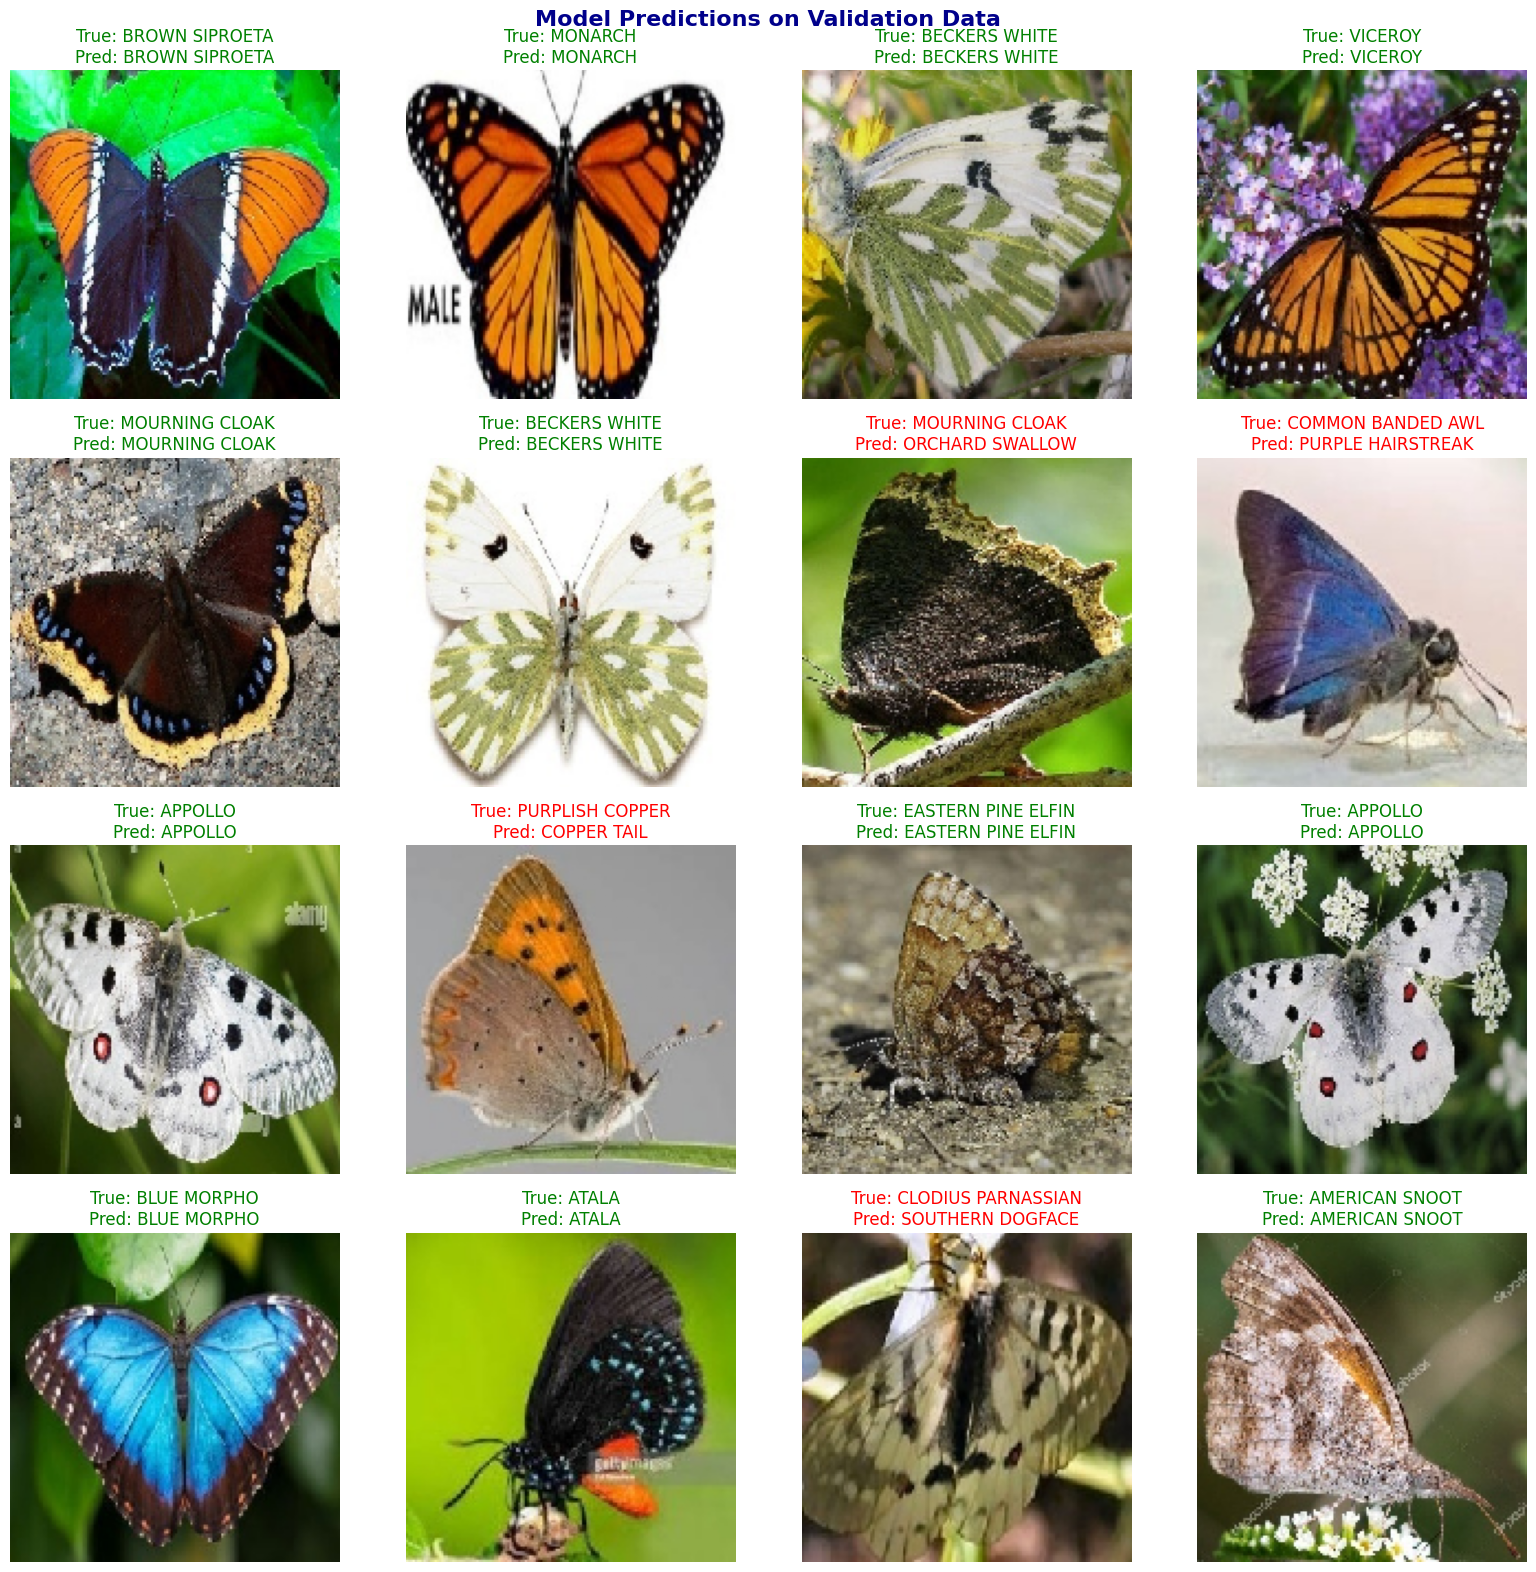

In [76]:
# Define the display_predictions function
def display_predictions(images, true_labels, pred_labels, class_names, num_images=16):
    num_images = min(num_images, len(images))
    cols = 4
    rows = (num_images // cols) + (num_images % cols > 0)
    plt.figure(figsize=(cols * 4, rows * 4))
    for i in range(num_images):
        ax = plt.subplot(rows, cols, i + 1)
        ax.imshow(images[i])
        true_label = class_names[true_labels[i]]
        pred_label = class_names[pred_labels[i]]
        color = 'green' if true_label == pred_label else 'red'
        ax.set_title(f"True: {true_label}\nPred: {pred_label}", color=color)
        ax.axis("off")
    plt.suptitle("Model Predictions on Validation Data", fontsize=16, fontweight='bold', color='darkblue')
    plt.tight_layout()
    plt.show()

# Now call the function
display_predictions(val_images, true_labels, pred_labels, class_names, num_images=16)
